In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# Cargamos los datos
df = pd.read_csv("https://raw.githubusercontent.com/santiagomunera0/Recursos/main/student-mat.csv", delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Preprocesamiento de datos
categorical_attributes = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                          'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical_attributes = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                        'Dalc', 'Walc', 'health', 'absences']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_attributes),
        ('cat', OneHotEncoder(), categorical_attributes)])

In [ ]:
# Aplicar el preprocesamiento al DataFrame
preprocessed_data = preprocessor.fit_transform(df)

# Obtener los nombres de las columnas después del preprocesamiento
column_names = numerical_attributes + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_attributes))

# Crear el DataFrame preprocesado
df_preprocessed = pd.DataFrame(preprocessed_data, columns=column_names)

# Concatenar el DataFrame preprocesado con las columnas no preprocesadas
df_preprocessed = pd.concat([df_preprocessed, df.drop(columns=numerical_attributes + categorical_attributes)], axis=1)

# Mostrar el DataFrame preprocesado
df_preprocessed

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5,6,6
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5,5,6
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,7,8,10
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15,14,15
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,9,9,9
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,14,16,16
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,10,8,7
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11,12,10


In [ ]:
print(df.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


In [ ]:
df_preprocessed.nunique()

age                   8
Medu                  5
Fedu                  5
traveltime            4
studytime             4
failures              4
famrel                5
freetime              5
goout                 5
Dalc                  5
Walc                  5
health                5
absences             34
school_GP             2
school_MS             2
sex_F                 2
sex_M                 2
address_R             2
address_U             2
famsize_GT3           2
famsize_LE3           2
Pstatus_A             2
Pstatus_T             2
Mjob_at_home          2
Mjob_health           2
Mjob_other            2
Mjob_services         2
Mjob_teacher          2
Fjob_at_home          2
Fjob_health           2
Fjob_other            2
Fjob_services         2
Fjob_teacher          2
reason_course         2
reason_home           2
reason_other          2
reason_reputation     2
guardian_father       2
guardian_mother       2
guardian_other        2
schoolsup_no          2
schoolsup_yes   

In [ ]:
df_preprocessed['G1'] = df['G1']
df_preprocessed['G2'] = df['G2']
df_preprocessed['G3'] = df['G3']

def nomalizarNotas(notas):
  # Definir el rango original y el nuevo rango
  min_original = 0
  max_original = 20
  nuevo_min = 0
  nuevo_max = 5

  # Aplicar la fórmula de escalamiento
  df_normalizado = (notas - min_original) * (nuevo_max - nuevo_min) / (max_original - min_original) + nuevo_min

  return df_normalizado

df_preprocessed['G1'] = nomalizarNotas(df_preprocessed['G1'])
df_preprocessed['G2'] = nomalizarNotas(df_preprocessed['G2'])
df_preprocessed['G3'] = nomalizarNotas(df_preprocessed['G3'])

df_preprocessed.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.25,1.50,1.50
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.25,1.25,1.50
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.75,2.00,2.50
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.75,3.50,3.75
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.50,2.50,2.50


In [ ]:
df_preprocessed['pass'] = np.where(df_preprocessed['G3'] > 3, True, False)
df_preprocessed.drop('G3', axis=1, inplace=True)
df_preprocessed

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,pass
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.25,1.50,False
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.25,1.25,False
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.75,2.00,False
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.75,3.50,True
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.50,2.50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.25,2.25,False
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.50,4.00,True
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.50,2.00,False
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.75,3.00,False


In [ ]:
X = df_preprocessed.drop('pass', axis=1)  # Variables predictoras
y = df_preprocessed['pass']  # Variable objetivo

In [ ]:
#Preparing Training, Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

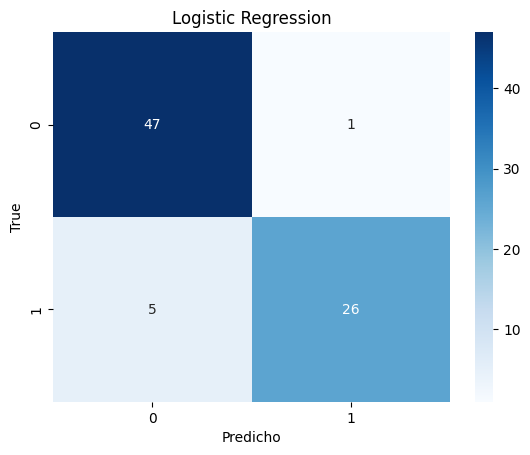

Logistic Regression:
Accuracy Cross Validation 88.90 %
Standard Deviation is 4.39 %
Accuracy: 0.9240506329113924
Precision: 0.9629629629629629
Recall: 0.8387096774193549
F1-score: 0.896551724137931
Confusion Matrix:
[[47  1]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94        48
        True       0.96      0.84      0.90        31

    accuracy                           0.92        79
   macro avg       0.93      0.91      0.92        79
weighted avg       0.93      0.92      0.92        79

-------------------------------------


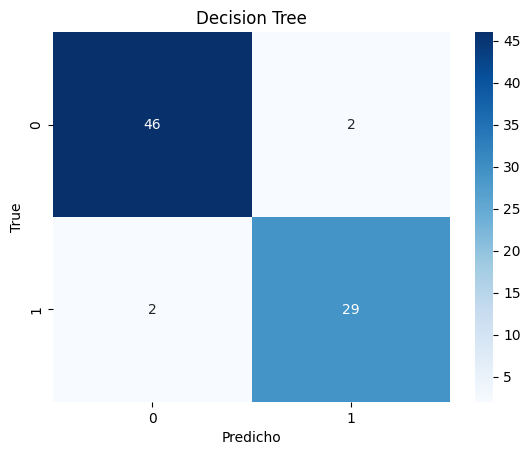

Decision Tree:
Accuracy Cross Validation 92.44 %
Standard Deviation is 3.71 %
Accuracy: 0.9367088607594937
Precision: 0.9333333333333333
Recall: 0.9032258064516129
F1-score: 0.9180327868852459
Confusion Matrix:
[[46  2]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96        48
        True       0.94      0.94      0.94        31

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79

-------------------------------------


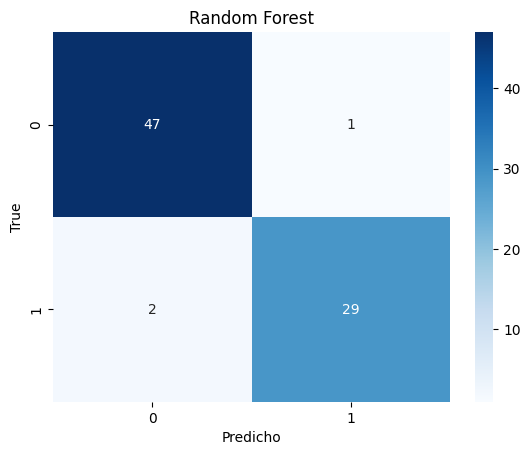

Random Forest:
Accuracy Cross Validation 92.74 %
Standard Deviation is 3.13 %
Accuracy: 0.9367088607594937
Precision: 0.9642857142857143
Recall: 0.8709677419354839
F1-score: 0.9152542372881356
Confusion Matrix:
[[47  1]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97        48
        True       0.97      0.94      0.95        31

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79

-------------------------------------


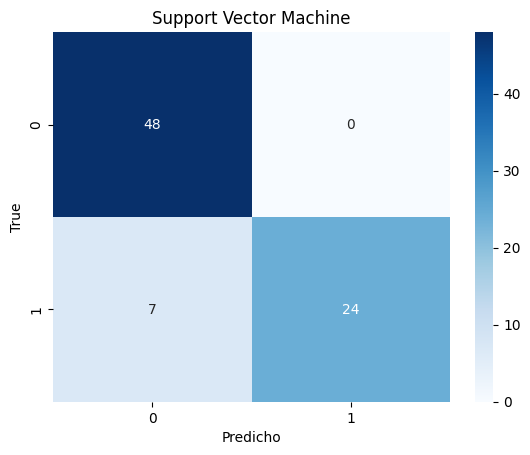

Support Vector Machine:
Accuracy Cross Validation 88.94 %
Standard Deviation is 4.72 %
Accuracy: 0.9113924050632911
Precision: 1.0
Recall: 0.7741935483870968
F1-score: 0.8727272727272727
Confusion Matrix:
[[48  0]
 [ 7 24]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        48
        True       1.00      0.77      0.87        31

    accuracy                           0.91        79
   macro avg       0.94      0.89      0.90        79
weighted avg       0.92      0.91      0.91        79

-------------------------------------


,Model,Accuracy Cross Validation,Standard Deviation,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,88.901210,4.387444,0.924051,0.962963,0.838710,0.896552
1,Decision Tree,92.439516,3.713729,0.936709,0.933333,0.903226,0.918033
2,Random Forest,92.741935,3.131172,0.936709,0.964286,0.870968,0.915254
3,Support Vector Machine,88.941532,4.717710,0.911392,1.000000,0.774194,0.872727


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
matrix = [];

# Entrenar y evaluar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #cv = StratifiedKFold(n_splits=10, shuffle=False)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model.fit(X_train, y_train)

    # Obtener las predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualizar la matriz de confusión con seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicho")
    plt.ylabel("True")
    plt.show()

    matrix.append([name, accuracies.mean()*100, accuracies.std()*100, accuracy, precision, recall, f1])

    '''data = { 'Accuracy Cross Validation':  [accuracies.mean()*100],
      'Standard Deviation': [accuracies.std()*100],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Recall': [recall],
      'F1-score': [f1],
    }

    df = pd.DataFrame(data)
    print(df.to_markdown())'''

    print(f"{name}:")
    print("Accuracy Cross Validation {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------")

df = pd.DataFrame(data=matrix, columns=['Model', 'Accuracy Cross Validation', 'Standard Deviation', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
df

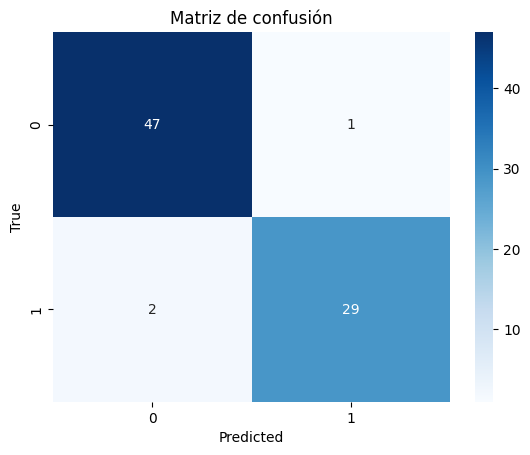

In [ ]:
# Visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo de Regresión Logística
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<ipython-input-14-b71c181eb64a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mask = np.triu(df.corr())
<ipython-input-14-b71c181eb64a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h_map = sns.heatmap(df.corr(), annot=True, cmap='Blues')


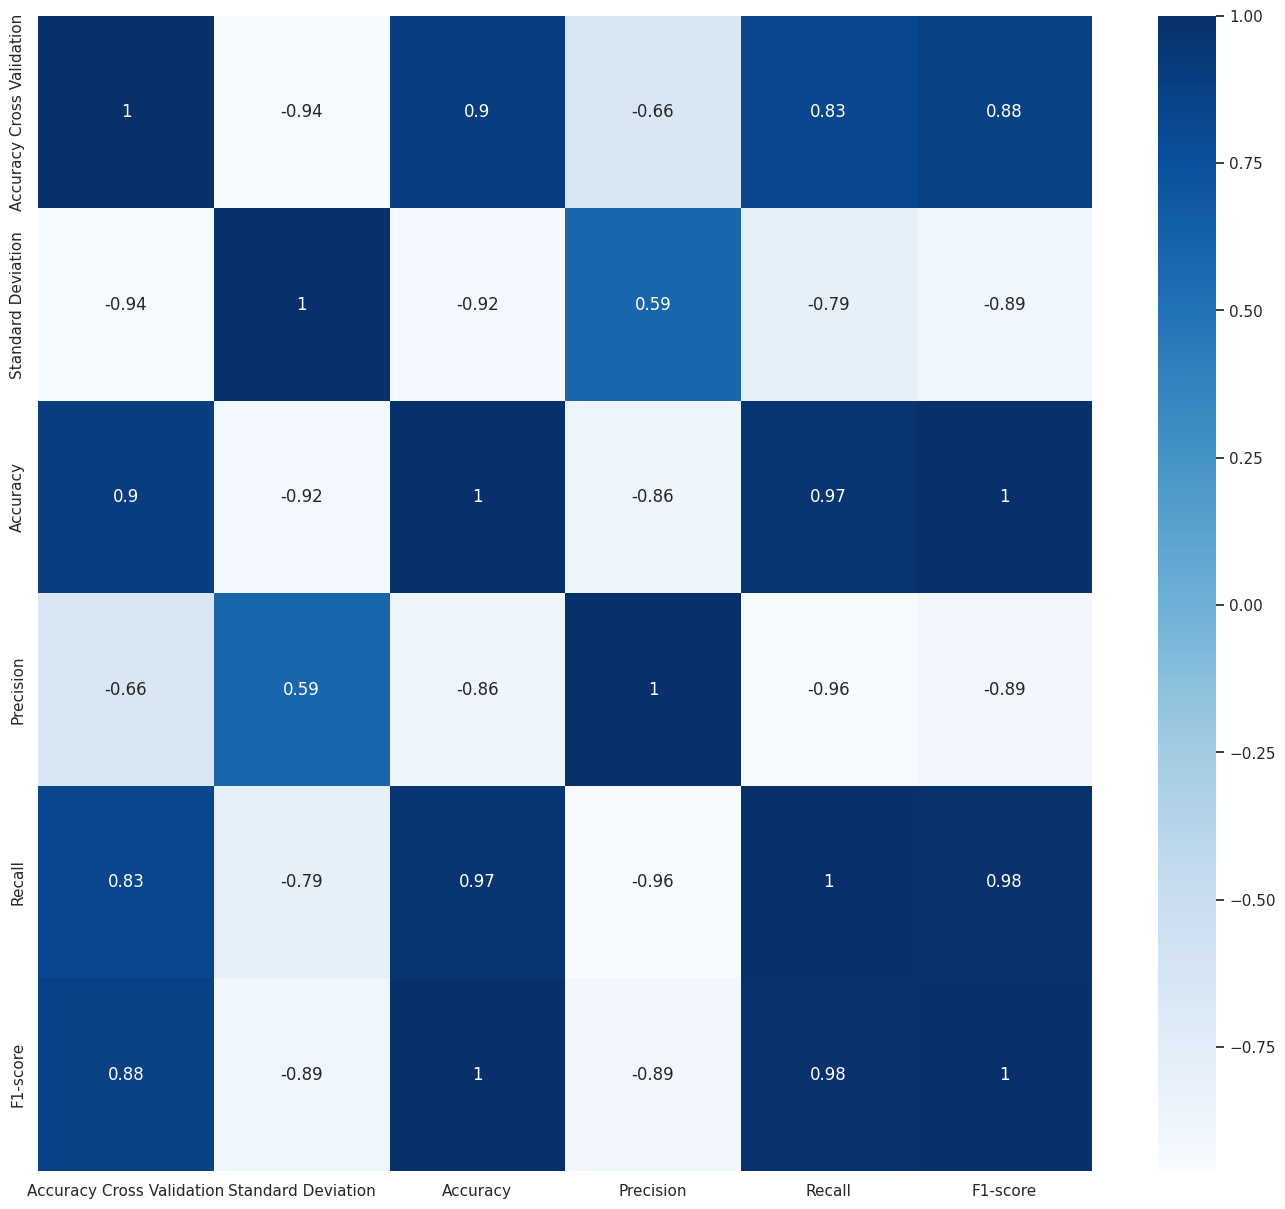

In [ ]:
plt.figure(figsize=(17, 15)) 
corr_mask = np.triu(df.corr()) 
sns.set(font_scale=1)
h_map = sns.heatmap(df.corr(), annot=True, cmap='Blues') 

plt.show()

In [ ]:
df_notas = nomalizarNotas(df['G3'])

# sns.barplot(data=df, x="Medu", y="G3")

plt.rcdefaults()
plt.bar(df['failures'], df_notas, width = 0.4)
plt.xlabel("Número de materias perdidas anteriores")
plt.ylabel("Notas")
plt.show()

plt.bar(df['Medu'], df_notas, width = 0.4)
plt.xlabel("Educación de la Madre")
plt.ylabel("Notas")
plt.show()


plt.bar(df['Dalc'], df_notas, width = 0.4)
plt.xlabel("Consumo de alcohol entre semana")
plt.ylabel("Notas")
plt.show()


KeyError: ignored

In [ ]:
#Validating The Machine Learning Model
contador_errores = 0
for i in range(len(y_test)):
    real = y_test.iloc[i]
    pred = model.predict(X_test.iloc[i].to_frame().T)[0]
    print(f'Real Value      ----->>>>> {real}\n'
          f'Predicted Value ----->>>>> {pred}')
    print()

    if (real != pred):
      contador_errores += 1

print(f"Errores calculados: {contador_errores}")      

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Value      ----->>>>> False
Predicted Value ----->>>>> False

Real Value      ----->>>>> True
Predicted Value ----->>>>> True

Real Va

In [ ]:
# Guardar el modelo en un archivo
with open('modelo_entrenado.pkl', 'wb') as file:
    pickle.dump(model, file)